# `PyShp`对`ESRI Shapefile`文件的操作

In [1]:
#操作目录和文件
import os; nb_dir = os.getcwd(); 
#导入shp
import shapefile as shpf; 
#处理几何信息
import shapely; 
import shapely.geometry as shplgeo, shapely.affinity as shplaffin; 
import shapely.ops as shplops; 
#投影变换
import pyproj; 

## `shp`文件的导入
导入华中农业大学2022年的道路网
* 主要依据: 主校区面积为湖北省内最大, 道路网分布范围广

In [2]:
HZAU_Path_Minor = shpf.Reader(os.sep.join([nb_dir, 
    "HZAU_Path_Minor", "Path_Minor_Adj_02_CGCS.shp"]))

In [15]:
HZAU_Path_Minor_shp = HZAU_Path_Minor.shapes(); 

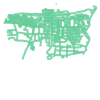

In [16]:
HZAU_Path_Minor_shplgeo = []; 
for sgm in HZAU_Path_Minor_shp: 
    sgm_shplgeo = shplgeo.LineString(sgm.points); 
    HZAU_Path_Minor_shplgeo.append(sgm_shplgeo); 
shplgeo.MultiLineString(HZAU_Path_Minor_shplgeo)

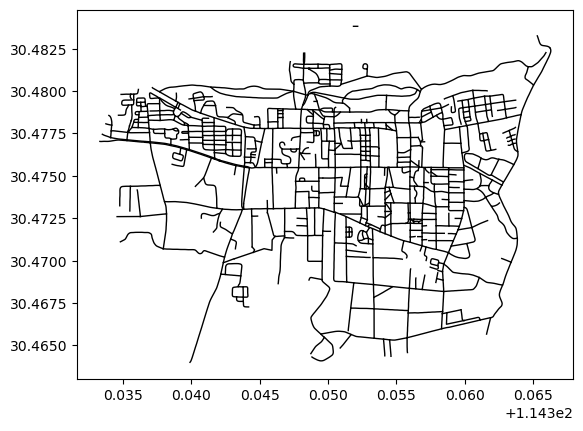

In [8]:
from matplotlib import pyplot as plt; 
for pline in HZAU_Path_Minor_shplgeo: 
    x, y = pline.coords.xy; 
    plt.plot(x, y, color="black", linewidth=1); 
plt.show(); 

## `shp`文件的投影变换

In [9]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [10]:
wgs_to_utm349 = pyproj.Transformer.from_crs( 
    "EPSG:4326", #WGS 1984 Geodesic
    'epsg:32650', #WGS 1984 / UTM 3° Zone 49
).transform; 

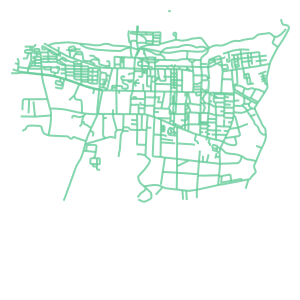

In [11]:
HZAU_Path_Minor_GK_shplgeo = shplops.transform( \
    lambda lon, lat: wgs_to_utm349(lat, lon), 
    shplgeo.MultiLineString(HZAU_Path_Minor_shplgeo)); 
HZAU_Path_Minor_GK_shplgeo

In [12]:
HZAU_Path_Minor_GK_shplgeo.length

81850.14853506155

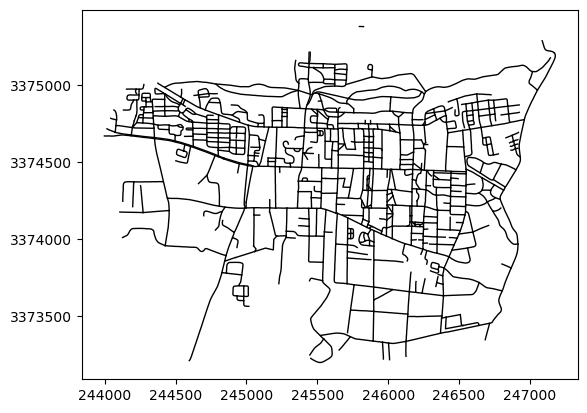

In [13]:
from matplotlib import pyplot as plt; 
for pline in HZAU_Path_Minor_GK_shplgeo: 
    x, y = pline.coords.xy; 
    plt.plot(x, y, color="black", linewidth=1); 
plt.show(); 